### Examples of libYuki [Julia](https://julialang.org/) branch ###

This file is writen with Simplified [Chinese](https://en.wikipedia.org/wiki/Chinese_language). 
You might need a translation application to read it, like [Lingva](https://lingva.ml/). 
Please feel free, I'll try my best to describe them as simple as I can.
At the first occurrence of each term, a reference [link](https://en.wikipedia.org/wiki/Hyperlink) will be given.

这份文件使用简体[中文](https://en.wikipedia.org/wiki/Chinese_language)编写.
为了阅读它, 你可能需要一个翻译程序, 如: [Lingva](https://lingva.ml/).
请放心, 我会尽己所能简单描述.
在每一个术语第一次出现时, 参考[链接](https://en.wikipedia.org/wiki/Hyperlink)将会被给出. 

In [1]:
println("使用 libYuki Julia 分支时, 需要先加载需要的文件. ")
println("当 libYuki/julia 位于与项目不同的目录时, 请参照本段代码定义引用路径.")
libYukiJuliaDir::String = "./julia/"
include(joinpath(libYukiJuliaDir, "libYukiBasic.jl"));
include(joinpath(libYukiJuliaDir, "libYukiConstant.jl"));
include(joinpath(libYukiJuliaDir, "libYukiMath.jl"));
include(joinpath(libYukiJuliaDir, "libYukiPhysics.jl"));
include(joinpath(libYukiJuliaDir, "libYukiTransit.jl"));
include(joinpath(libYukiJuliaDir, "libYukiKeplerMission.jl"));

using Plots;

使用 libYuki Julia 分支时, 需要先加载需要的文件. 
当 libYuki/julia 位于与项目不同的目录时, 请参照本段代码定义引用路径.


##### 1. 基础函数集合: libYukiBasic.jl #####

**1.1 近似不对称误差: libYukiBasicMeasurementWithMissing**

定义一个带有[不确定度](https://en.wikipedia.org/wiki/Uncertainty)的[变量](https://en.wikipedia.org/wiki/Variable_(computer_science)), 可以直接使用 [Measurements](https://juliaphysics.github.io/Measurements.jl/stable/) [Julia 软件包](https://julialang.org/packages/).
该包将会[重载(大部分)运算符号](https://en.wikipedia.org/wiki/Operator_overloading), 并自动处理[误差传递](https://en.wikipedia.org/wiki/Propagation_of_uncertainty).
如:
> a = $1.25 \pm 0.03$

但是, Measurements 不能处理不对称误差, 如: 
> (式 1.1) 无法定义: a = $1.25^{+0.01}_{-0.02}$

在大部分情况下, 采纳上下界的[算术平均值](https://en.wikipedia.org/wiki/Arithmetic_mean)可以作为合理[近似](https://en.wikipedia.org/wiki/Approximation). 
但以下情况需要**另行考虑**:
- 误差分布高度不对称;
- 参数接近[微分方程](https://en.wikipedia.org/wiki/Differential_equation)的[边界](https://en.wikipedia.org/wiki/Boundary_value_problem#Boundary_value_conditions);
- 用于高阶[非线性系统](https://en.wikipedia.org/wiki/Nonlinear_system).

[函数(子程序)](https://en.wikipedia.org/wiki/Function_(computer_programming)) libYukiBasicMeasurementWithMissing 能够完成上面的工作, 并自动处理 Julia 中的 [Missing](https://docs.julialang.org/en/v1/manual/missing/) [类型](https://en.wikipedia.org/wiki/Data_type).
下面是以式 1.1 为模版的示例.

In [2]:
println("对式 1.1 中的表达式进行处理, 得到: ", libYukiBasicMeasurementWithMissing(1.25 , 0.02, 0.01))
println("\t当类似数据的数值为 missing 时会直接得到: ", libYukiBasicMeasurementWithMissing(missing, 0.02, 0.01))
println("\t当类似数据的不确定度存在 missing 时, 会得到不确定度为 0 的值: ", libYukiBasicMeasurementWithMissing(1.25, missing, 0.01))

对式 1.1 中的表达式进行处理, 得到: 1.25 ± 0.015
	当类似数据的数值为 missing 时会直接得到: missing
	当类似数据的不确定度存在 missing 时, 会得到不确定度为 0 的值: 1.25 ± 0.0


##### 2. 常数集合: libYukiConstant.jl #####

这里定义了一些常用的[数学常数](https://en.wikipedia.org/wiki/Mathematical_constant), [物理常数](https://en.wikipedia.org/wiki/Physical_constant), 以及其他学科的常用常数. 
对于测量得到的常数, 将尽可能使用最新的测量值.

##### 3. 数学函数集合: libYukiMath.jl #####

**3.1 计算欧几里得距离: libYukiMathVectorToDistance**

在 [$L^p$ 空间(勒贝格空间)](https://en.wikipedia.org/wiki/Lp_space) 装配 $p=2$ 的 [$p-$范数](https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm)(或称[欧几里得范数](https://en.wikipedia.org/wiki/Euclidean_space#Euclidean_norm))时, 两个点之间的[距离](https://en.wikipedia.org/wiki/Metric_space)可以由[欧几里得距离](https://en.wikipedia.org/wiki/Euclidean_distance)定义:
> $\left|\left|\vec d\right|\right|_2 = \sqrt{\sum\limits_i x_i^2}$

在[笛卡尔坐标系](https://en.wikipedia.org/wiki/Cartesian_coordinate_system)中, 两点间的距离由下式定义:
> $\left|\overrightarrow{xy}\right| = \left|\overrightarrow{y} - \overrightarrow{x}\right| = \sqrt{\sum\limits_{i=1}^3 (y_i - x_i) ^ 2}$

函数 libYukiMathVectorToDistance 可以完成 $\forall p$ 的欧几里得距离计算.
下面是 $\overrightarrow{xy} = (1 \pm 0.01, 1 \pm 0.1, 1 \pm 0.2)$ 的示例.

In [3]:
println(libYukiMathVectorToDistance([1 ± 0.01, 1 ± 0.1, 1 ± 0.2]))

1.73 ± 0.13


**3.2 前向积累自动微分: libYukiMathForwardDifference**

对于给定的一元函数 $f(x)$, 在 $x = x_0$ 处的[导数](https://en.wikipedia.org/wiki/Derivative)可以由下面的定义给出:
> $f'(x_0) = \left.\frac{df(x)}{dx}\right|_{x \to x_0}$

在进行[数值分析](https://en.wikipedia.org/wiki/Numerical_analysis)时, 通常需要使用形似下面的方法来得到该导数值:
> $f'(x_0) \approx \frac{f(x + h) - f(x)}{h}$

若想要得到更高精度的近似结果, 往往需要使用高阶[数值微分](https://en.wikipedia.org/wiki/Numerical_differentiation)方法.
Julia 的 [ForwardDiff](https://juliadiff.org/ForwardDiff.jl/stable/) 软件包提供了一种[前向积累](https://en.wikipedia.org/wiki/Automatic_differentiation#Forward_accumulation)的[自动微分](https://en.wikipedia.org/wiki/Automatic_differentiation)方法.

函数 libYukiMathForwardDifference 可以完成这种自动微分计算.
下面给出一个对于 $f(x) = x^2$ 在 $x_0 = 2 \pm 0.1$ 处计算导数 $\left.\frac{df(x)}{dx}\right|_{x \to x_0}$ 的例子, 其中 $f(x)$ 通过 [$\lambda-$演算](https://en.wikipedia.org/wiki/Anonymous_function)定义.

In [4]:
println(libYukiMathForwardDifference(x -> x ^ 2, 2 ± 0.1))

4.0 ± 0.2


**3.3 一维自适应积分: libYukiMathOneDimensionalIntegration**

对于给定的一元函数 $f(x)$, 在 $(x_a, x_b)$ [区间](https://en.wikipedia.org/wiki/Interval_(mathematics))内的[积分](https://en.wikipedia.org/wiki/Integral).
[矩形方法](https://en.wikipedia.org/wiki/Trapezoidal_rule)是求[数值积分](https://en.wikipedia.org/wiki/Numerical_integration)的方法之一:
> $\int_{x_a}^{x_b}f(x)dx = \lim\limits_{n \to \infty}\sum\limits_{i = 0}^{n - 1}f\left(x_a + \frac{x_b - x_a}{n}\cdot i\right)\cdot \frac{x_b - x_a}{n}$

与数值微分类似, 若希望得到更高精度的数值计算结果, 往往需要更复杂的处理技巧.
在 Julia 中 [QuadGK](https://juliamath.github.io/QuadGK.jl/stable) 软件包提供了 [高斯-克朗罗德(Gauss–Kronrod)正交积分](https://en.wikipedia.org/wiki/Gauss%E2%80%93Kronrod_quadrature_formula)方法.

在数值积分中, 受计算机的精度限制以及为了与计算效率取得权衡, 计算结果往往存在误差. QuadGK 在计算积分时同时会给出计算误差. 

当积分的输入参数带有不确定度时, 即使使用了[符号代数系统](https://en.wikipedia.org/wiki/Computer_algebra_system), 计算结果 $r$ 本身也会带有一定的不确定度 $\sigma_r$. 
对于数值方法而言, 计算过程也会引入新的不确定度 $err \pm \sigma{err}$.
此时通过[误差传递方法](https://en.wikipedia.org/wiki/Propagation_of_uncertainty)可以得到最终的结果.

即当计算结果为 $r \pm \sigma_r$, 计算误差为 $err \pm \sigma_{err}$ 最终输出为:
> $r \pm \sqrt{\sigma_r ^ 2 + \sigma_{err} ^ 2}$

函数 libYukiMathOneDimensionalIntegration 可以完成这种数值积分计算.
下面给出一个对于 $f(x) = x ^ 2$ 在区间 $[0 \pm 0.01, 1 \pm 0.05]$ 上进行数值积分的例子, 其中 $f(x)$ 依然通过 $\lambda-$演算定义.

In [5]:
println(libYukiMathOneDimensionalIntegration(x -> x ^ 2, 0 ± 0.01, 1 ± 0.05))

0.333 ± 0.05


##### 4. 物理函数集合: libYukiPhysics.jl #####

**4.1 引力势: libYukiPhysicsGravitationalPotential**

在距离[质量](https://en.wikipedia.org/wiki/Mass)为 $M$ 的物体 $r$ 处(即相对[位移](https://en.wikipedia.org/wiki/Displacement_(geometry)) $\vec r$ 处), 由该物体产生的[引力势](https://en.wikipedia.org/wiki/Gravitational_potential)为: 
> $\Phi(\vec r) = -\frac{GM}{\left|\vec r\right|}$, 其中 $G$ 为[引力常数](https://en.wikipedia.org/wiki/Gravitational_constant)

函数 libYukiMathOneDimensionalIntegration 可以完成引力势的计算.
下面以质量 $M = 1 \pm 0.1$, 相对位移 $\vec r = (0 \pm 0.1, 0.1 \pm 0, 0 \pm 0.2)$ 为例, 引力常数 $G$ 调用 libYukiConstant 中的值.

In [6]:
libYukiPhysicsGravitationalPotential(libYukiConstantGravitationalConstant, 1 ± 0.1, libYukiMathVectorToDistance([0 ± 0.1, 0.1 ± 0, 0 ± 0.2]))

-6.67e-10 ± 6.7e-11

**4.1.1 可微分的引力势: libYukiPhysicsGravitationalPotentialDifferentiable**

为了提高计算速度, libYuki 尽量避免使用[自动类型推断](https://en.wikipedia.org/wiki/Type_inference)而是广泛采用[静态类型](https://en.wikipedia.org/wiki/Type_system#Static_type_checking).
libYuki 中提供的大部分函数使用 Measurements 软件包提供的带不确定度变量类型, 这些类型不被 ForwardDiff 软件包支持.
虽然 Measurems 的文档中指出, [Calculus](https://www.juliapackages.com/p/calculus) 软件包可以支持对 Measurement 类型变量的自动微分, 但 Calculus 软件包已经停止更新.

函数 libYukiPhysicsGravitationalPotentialDifferentiable 提供了引力势函数 libYukiPhysicsGravitationalPotential 的可微分版本.
目前, 该版本舍弃了位移的不确定度以换取可微分特性, 并且使用了 Julia 运行时的自动类型推断特性.

下面是以 $M$ 为太阳质量, 引力常数为 $G$ (两者都从 libYukiConstant 中调用)为例, 计算相对位移 $\vec r = (0 \pm 0.1, 0.1 \pm 0, 0 \pm 0.2)$ 处的导数值.
引力势函数通过 $\lambda-$演算定义.

In [7]:
libYukiMathForwardDifference(x -> libYukiPhysicsGravitationalPotentialDifferentiable(libYukiConstantGravitationalConstant, libYukiConstantSolarMass, x), libYukiMathVectorToDistance([0 ± 0.1, 0.1 ± 0, 0 ± 0.2]))

1.3271678692499999e22 ± 0.0

**4.2 保守向量场中势能的力: libYukiPhysicsPotentialEnergyForce**

在[拉格朗日力学](https://en.wikipedia.org/wiki/Lagrangian_mechanics)中, [保守向量场](https://en.wikipedia.org/wiki/Conservative_vector_field)里具有[势能](https://en.wikipedia.org/wiki/Potential_energy) $U(\vec r)$ 的物体在与零势能位置相对位移 $\vec r$ 处受到的力为:
> $\vec F = -\nabla U(\vec r)$, 其中 $\nabla$ 为[向量微分算子](https://en.wikipedia.org/wiki/Del)

函数 libYukiPhysicsPotentialEnergyForce 提供了计算该力的功能.
需要注意, 该函数只接受可微分的势能函数.
下面继承 4.1.1 中的例子, 求质量为 $0.1 M$ 的物体在该点所受到的力.

In [8]:
libYukiPhysicsPotentialEnergyForce(x -> 0.1 * Measurements.value(libYukiConstantSolarMass) * libYukiPhysicsGravitationalPotentialDifferentiable(libYukiConstantGravitationalConstant, libYukiConstantSolarMass, x), [0 ± 0.1, 0.1 ± 0, 0 ± 0.2])

3-element Vector{Measurement{Float64}}:
                   -0.0 ± 2.6e51
 -2.6390401288068936e51 ± 0.0
                   -0.0 ± 5.3000000000000004e51

**4.3 力产生的加速度: libYukiPhysicsForceAcceleration**

在给定[拉格朗日量](https://en.wikipedia.org/wiki/Lagrangian_(field_theory)) $L = K(\dot{\vec q}) - V(\vec q)$ ($K$ 为[动能](https://en.wikipedia.org/wiki/Kinetic_energy), $V$ 为势能, $\vec q$ 为广义位移)的系统中, 运动可以由[拉格朗日方程](https://en.wikipedia.org/wiki/Lagrangian_mechanics#Equations_of_motion)确定:
> $\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\vec q}}\right) = \frac{\partial L}{\partial \vec q}$, 其中 $\dot{\vec q} = \frac{\partial \vec q}{\partial t}$

根据动能 $K$ 的表达式:
> $K(\dot{\vec q}) = \frac{1}{2}m\dot{\vec q ^ 2}$

在势能不显含[时间](https://en.wikipedia.org/wiki/Time)的情况下, 拉格朗日方程可以变化为
> $-\frac{\partial V}{\partial \vec q} = m\ddot{\vec q}$

根据 4.2 中的结论, 该式即[牛顿运动定律](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion)
> $\vec F = m\vec a$, 其中 $\vec a$ 为[加速度](https://en.wikipedia.org/wiki/Acceleration)

函数 libYukiPhysicsForceAcceleration 提供了根据力计算加速度的功能.
下面继承 4.2 中的例子, 求物体的加速度.

In [9]:
libYukiPhysicsForceAcceleration(libYukiPhysicsPotentialEnergyForce(x -> 0.1 * Measurements.value(libYukiConstantSolarMass) * libYukiPhysicsGravitationalPotentialDifferentiable(libYukiConstantGravitationalConstant, libYukiConstantSolarMass, x), [0 ± 0.1, 0.1 ± 0, 0 ± 0.2]), 0.1 * libYukiConstantSolarMass)

3-element Vector{Measurement{Float64}}:
         -0.0 ± 1.3e22
 -1.327168e22 ± 6.1e17
         -0.0 ± 2.7e22

**4.4 物理对象结构: libYukiPhysicsBody**

libYuki 目前提供一种简化的物理对象模型, 即每一个物体可以被抽象为
> 位于 $\vec x$, 速度为 $\vec v$, 质量为 $m$, 带电荷 $q$ 的半径为 $r$ 的均匀球体.

初始化方法 libYukiPhysicsBody 提供了定义这种结构体的功能. 
下面的例子定义了位于 $(0 \pm 0.1, 10 \pm 0.3, 20 \pm 0.5)$, 速度为 $(0.1 \pm 0, 1 \pm 0.1, 0.2 \pm 0.01)$, 质量为 $100 \pm 0.3$, 带电荷 $12 \pm 0.24$ 的半径为 $50 \pm 1$ 的均匀球体, 名为"$bodyA$".

In [10]:
libYukiPhysicsBody("bodyA", [0 ± 0.1, 10 ± 0.3, 20 ± 0.5], [0.1 ± 0, 1 ± 0.1, 0.2 ± 0.01], 100 ± 0.3, 12 ± 0.24, 50 ± 1)

libYukiPhysicsBody("bodyA", Vector{Measurement{Float64}}[[0.0 ± 0.1, 10.0 ± 0.3, 20.0 ± 0.5]], Vector{Measurement{Float64}}[[0.1 ± 0.0, 1.0 ± 0.1, 0.2 ± 0.01]], 100.0 ± 0.3, 12.0 ± 0.24, 50.0 ± 1.0)

**4.5 引力场中无碰撞 N 体运动仿真: libYukiPhysicsGravitationalNBodySimulation**

[N 体问题](https://en.wikipedia.org/wiki/N-body_problem)是研究多个物体在相互作用中如何随时间运动的问题, 通常是指在引力场中的 N 体问题.

引力场中的 N 体问题通常由下面的二阶[常微分方程](https://mathworld.wolfram.com/OrdinaryDifferentialEquation.html)组描述:
> $m_i\ddot{\vec q}=-\frac{\partial V}{\partial \vec q_i}$

libYuki 使用 Julia 的 [DifferentialEquations](https://docs.sciml.ai/DiffEqDocs/stable/) 和 [LinearAlgebra](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/) 软件包来求解此类方程.

目前, 这一问题在 $n \ge 3$ 时没有[闭形式解(解析解)](https://en.wikipedia.org/wiki/Closed-form_expression#Analytic_expression).
在研究中通常使用数值方法进行模拟, 即 [N 体模拟](https://en.wikipedia.org/wiki/N-body_simulation).

在封闭系统中, 通常要求系统的总[哈密顿量](https://en.wikipedia.org/wiki/Hamiltonian_mechanics#Phase_space_coordinates_(p,_q)_and_Hamiltonian_H)守恒.
而在[分析力学](https://en.wikipedia.org/wiki/Analytical_mechanics)中, 哈密顿量守恒可以描述为在[辛流形](https://en.wikipedia.org/wiki/Symplectic_manifold)上的[余切丛](https://en.wikipedia.org/wiki/Cotangent_bundle)(即[相空间](https://en.wikipedia.org/wiki/Phase_space))的[体积](https://en.wikipedia.org/wiki/Volume)不变.
关于如何保持哈密顿量不变, 参考[辛积分器](https://en.wikipedia.org/wiki/Symplectic_integrator).

下面是 DifferentialEquations 提供的显式 [Runge-Kutta](https://en.wikipedia.org/wiki/) 辛积分器列表(详细内容及参考文献请见[文档页](https://docs.sciml.ai/DiffEqDocs/stable/api/ordinarydiffeq/dynamicalodeexplicit/SymplecticRK/#OrdinaryDiffEqSymplecticRK)), 其中**加粗**部分表示 DifferentialEquations 文档中的推荐适用类型:

| 积分器 | 阶数 | 备注 | 本例运行的时间(以笔者机器为参考) |
| :---: | :-: | :--: | :-----: |
| SymplecticEuler | 1 | 最简单的辛积分形式. 仅推荐用于**不可微分的动力学方程**. | 230 ms |
| VelocityVerlet | 2 | **[分子动力学](https://en.wikipedia.org/wiki/Molecular_dynamics)广泛使用**的积分器. 精度较 McAte2 稍差. | 385 ms |
| VerletLeapfrog | 2 | 2 阶[蛙跳积分器](https://en.wikipedia.org/wiki/Leapfrog_integration). | 257 ms |
| LeapfrogDriftKickDrift | 2 | 同上. | 353 ms |
| PseudoVerletLeapfrog | 2 | 修正的[韦尔莱积分方法](https://en.wikipedia.org/wiki/Verlet_integration). | 490 ms |
| McAte2 | 2 | **大部分应用中常用**的高效 2 阶方法([McLachlan-Atela 方法](https://iopscience.iop.org/article/10.1088/0951-7715/5/2/011/meta)). 适合**对计算效率要求高的情况**. | 496 ms |
| Ruth3 | 3 | 无. | 833 ms |
| McAte3 | 3 | 优化的 3 阶 McLachlan-Atela 方法, 适合**对计算效率要求高的情况**. | 871 ms |
| CandyRoz4 | 4 | 无. | 833 ms |
| McAte4 | 4 | 4 阶 McLachlan-Atela 方法, 要求 2 次幂的动能形式. | 1051 ms |
| CalvoSanz4 | 4 | 优化的 4 阶方法. | 1047 ms |
| McAte5 | 5 | 5 阶 McLachlan-Atela 方法. | 1113 ms |
| Yoshida6 | 6 | 无. | 1645 ms |
| KahanLi6 | 6 | 优化的 6 阶方法. | 1596 ms |
| McAte8 | 8 | 8 阶 McLachlan-Atela 方法. | 2886 ms |
| KahanLi8 | 8 | 优化的 8 阶方法. | 3085 ms |
| SofSpa10 | 10 | 高精度的 10 阶方法. | 5826 ms |

函数 libYukiPhysicsGravitationalNBodySimulation 提供了引力场中无碰撞 N 体运动仿真功能.
下面的示例对 $Body 1$, $Body 2$ 和 $Body 3$ 三个物体在时间 $(0 \pm 0.1, 1111150.0 \pm 0.1)$ 范围内以步长 $100 ± 0.0$ 进行仿真. 
使用 SymplecticEuler 积分器以减少示例的运行时间.

In [11]:
bodyA = libYukiPhysicsBody("Body 1", [0.0 ± 0., 1 ± 0.1, 0 ± 0.], [5.775e-6 ± 0., 0. ± 0.5, 0.0 ± 0.0], 2.0 ± 0.0, 0 ± 0., 0. ± 0.);
bodyB = libYukiPhysicsBody("Body 2", [0.0 ± 0., -1 ± 0.2, 0 ± 0.], [-5.775e-6 ± 0., 0. ± 0.0, 0.0 ± 0.0], 2.0 ± 0.0, 0 ± 0., 0. ± 0.);
bodyC = libYukiPhysicsBody("Body 3", [0.1 ± 0., 0.0 ± 0.2, 0 ± 0.], [0 ± 0., 0. ± 0.0, 0.0 ± 0.0], 1 ± 0.0, 0 ± 0., 0. ± 0.);

NBodySolution = libYukiPhysicsGravitationalNBodySimulation(0 ± 0.1, 1111150.0 ± 0.1, 100 ± 0.0, [bodyA, bodyB, bodyC], SymplecticEuler(), libYukiConstantGravitationalConstant);

下面是物体的运动轨迹.

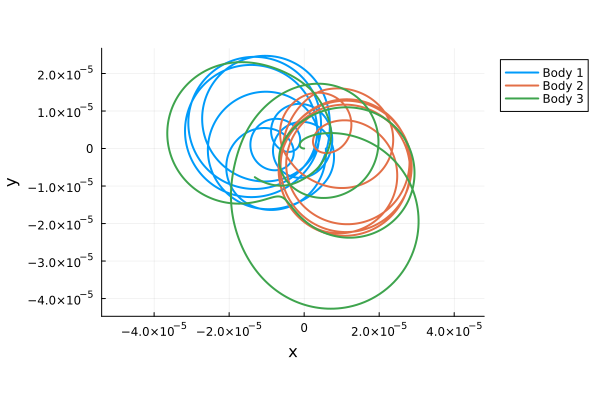

In [12]:
steps = length(NBodySolution.t)
plot();
for (index, body) in enumerate([bodyA, bodyB, bodyC])
    plot!([Measurements.value(body.position[index][1]) for index in 1 : steps], [Measurements.value(body.position[index][2]) for index in 1 : steps], label="Body $index", lw=2);
end
plot!(xlabel="x", ylabel="y", aspect_ratio=1, legend=:outertopright)

##### 5. NASA Kepler 任务功能集合: libYukiKeplerMission.jl #####

**5.1 下载 Kepler 任务观测到的光变曲线: libYukiKeplerMissionDownloadLightCurve**

函数 libYukiKeplerMissionDownloadLightCurve 提供了获得[NASA Kepler 任务](https://en.wikipedia.org/wiki/Kepler_space_telescope)观测到的[光变曲线](https://en.wikipedia.org/wiki/Light_curve)的功能.

该函数返回经过校正的时间([BJT](https://en.wikipedia.org/wiki/Barycentric_Julian_Date)), 和含有不确定度的光度序列.